#Post Test - Madaline

Madaline (Many Adaptive Linear Neuron) merupakan sebuah arsitektur jaringan saraf tiruan yang tersusun dari sekumpulan Adaline. Berbeda dengan Adaline, Madaline merupakan sebuah jaringan multilayer yang terdiri dari input, hidden, dan output layer.

Pada praktikum sebelumnya, kita sudah menerapkan Madaline dengan fungsi aktivasi bipolar pada pengujiannya. Hal ini dikarenakan sebelumnya kita menggunakan Madaline untuk kasus klasifikasi.

Pada Post Test kali ini, teman-teman akan menerapkan Madaline untuk kasus regresi polinomial orde 2.
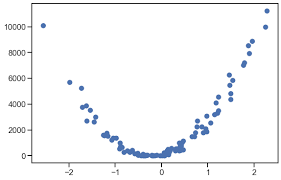



## Kode (jangan diubah)

Fungsi Training Madaline

In [1]:
import numpy as np

def madaline_fit(train_data,train_target,alpha=0.1,max_epoch=-1):
  w = np.random.random((2,2))
  v = np.array([0.5,0.5])
  b = np.random.random(2)
  b = np.append(b,0.5)
  epoch = 0
  aktivasi_linstep = np.vectorize(linstep)
  aktivasi_relu = np.vectorize(relu)
  weight_updated = True

  while weight_updated == True and epoch < max_epoch:
    weight_updated = False

    for data,target in zip(train_data,train_target):
      z_in = np.dot(data,w)
      z_in = z_in + b[:-1]
      z = aktivasi_relu(z_in)
      y_in = np.dot(z,v) + b[-1]
      y = aktivasi_linstep(y_in)
      error = abs(y - target)

      if error > 1:
        weight_updated = True
        index = np.where((z_in>0) | (z_in<0))[0]
        b[index] = b[index] - alpha * error
        w[:, index] = w[:, index] - alpha * error * data

    epoch = epoch +1
  return (w,v,b,epoch)

## Masalah

Diketahui terdapat persamaan kuadrat yang memetakan x ke f(x). Teman-teman diharapkan bisa menerapkan Madaline untuk menyelesaikan permasalahan polinomial berdasarkan data yang diberikan.

Berikut beberapa petunjuk yang bisa diperhatikan.

1.   Buat fungsi aktivasi relu dengan nama relu() dan linstep dengan nama linstep().
2.   Gunakan fungsi Relu untuk hidden layer dan linstep pada output layer.
3.   Nilai output / hasil prediksi tidak harus sama persis dengan hitungan matematikanya, tetapi setidaknya mendekati.
4.   Teman-teman bebas menentukan epoch, learning rate, dan parameter lainnya selama proses training berjalan dan menghasilkan prediksi yang sesuai.



Data

In [2]:
# pada x(fitur), indeks kedua memiliki nilai yang sama seperti indeks pertama
# contoh: f(x,y) = ax^2 + by^2 + cxy + dx + ey + f
# x=y
# f(x,y) = 1x^2 + 2y^2 + 3xy + 4x + 5y + 6
# f(x,y) = 6x^2 + 9x + 6

z = np.array([[-5,-5],[-4.5,-4.5],[-4,-4],[-3.5,-3.5],[-3,-3],[-2.5,-2.5],[-2,-2],
              [-1.5,-1.5],[-1,-1],[-0.5,-0.5],[0,0],[0.5,0.5],[1,1],[1.5,1.5],[2,2],
              [2.5,2.5],[3,3],[3.5,3.5],[4,4],[4.5,4.5],[5,5]])

fx_values = []

for x, y in z:
    fx = 5*(x**2) + 3*(y**2) + 2*x*y + 1*x + 6*y + 2
    fx_values.append(fx)

fx_values = np.array(fx_values)

Jangan ubah kode visualisasi fungsi kuadrat

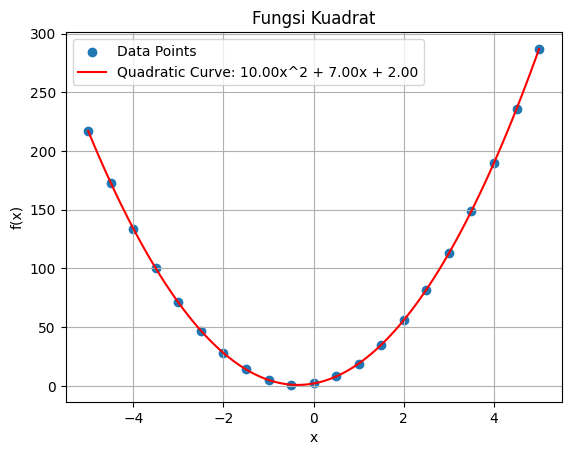

In [3]:
import matplotlib.pyplot as plt

# Fit a quadratic curve to the data
coefficients = np.polyfit(z[:,0], fx_values, 2)
a, b, c = coefficients

# Generate x values for the curve
x_curve = np.linspace(-5, 5, 100)
# Calculate corresponding y values using the quadratic equation
y_curve = a * x_curve**2 + b * x_curve + c

# Plot the data points and the fitted quadratic curve
plt.scatter(z[:,0], fx_values, label='Data Points')
plt.plot(x_curve, y_curve, label=f'Quadratic Curve: {a:.2f}x^2 + {b:.2f}x + {c:.2f}', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fungsi Kuadrat')
plt.legend()
plt.grid(True)
plt.show()

Buat fungsi aktivasi linear bernama linstep()

In [4]:
def linstep(y):
  return y

Buat fungsi aktivasi relu bernama relu()

In [5]:
def relu(x):
  if x<0:
    y = np.minimum(0,x)
    return -1 * y
  else:
    return np.maximum(0,x)

Buat fungsi pengujian bernama madaline_predict()

In [11]:
#mirip dengan di modul, tp yg membedakan z menggunakan aktivasi relu dan y menggunakan aktivasi linstep

def madaline_predict(w,v,b,test_data):
  aktivasi_linstep = np.vectorize(linstep)
  aktivasi_relu = np.vectorize(relu)
  z_in = np.dot(test_data, w) + b[:-1]
  z = aktivasi_relu(z_in)
  y_in = np.dot(z, v) + b[-1]
  y = aktivasi_linstep(y_in)
  return y

Uji dengan x_test

In [15]:
# isi parameter max_epoch dan alpha dan analisis hasilnya oleh praktikan

x_test = z

(w,v,b,epoch) = madaline_fit(z, fx_values, alpha= 0.1, max_epoch= 1)
output = madaline_predict(w,v,b,x_test)

print('\nOutput:', output)
print('Epoch:', epoch)


Output: [1021845.71493699  893521.93708702  765198.15923706  636874.38138709
  508550.60353712  380226.82568715  251903.04783719  123579.26998722
    4745.50786275  133069.28571272  261393.06356268  389716.84141265
  518040.61926262  646364.39711258  774688.17496255  903011.95281252
 1031335.73066249 1159659.50851245 1287983.28636242 1416307.06421239
 1544630.84206236]
Epoch: 1


Jangan ubah kode visualisasi hasil regresi

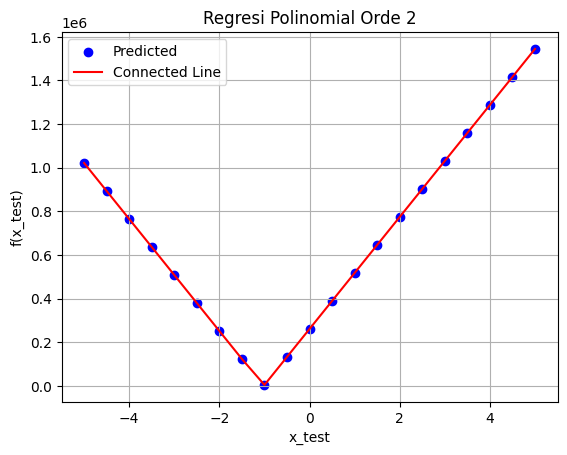

In [16]:
# Extract the first feature from x_test
x_test_first_feature = x_test[:, 0]

# Sort the points based on the first feature
sorted_indices = np.argsort(x_test_first_feature)
sorted_x_test_first_feature = x_test_first_feature[sorted_indices]
sorted_output = output[sorted_indices]

# Create a scatter plot
plt.scatter(x_test_first_feature, output, label='Predicted', color='blue')

# Plot a line connecting the sorted points
plt.plot(sorted_x_test_first_feature, sorted_output, color='red', label='Connected Line')

plt.xlabel('x_test')
plt.ylabel('f(x_test)')
plt.title('Regresi Polinomial Orde 2')
plt.legend()
plt.grid(True)
plt.show()

Jangan ubah kode visualisasi perbandingan nilai true dengan hasil prediksi

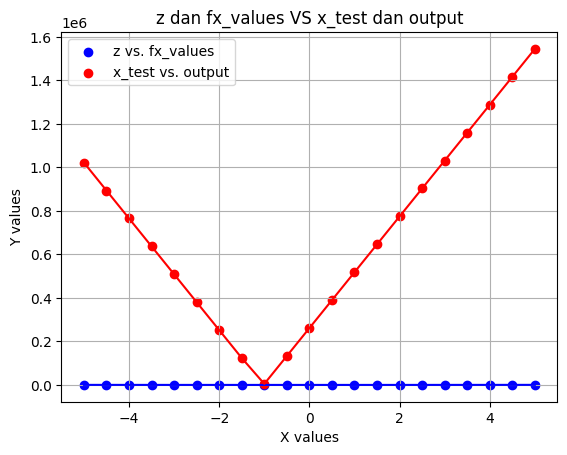

In [17]:
import matplotlib.pyplot as plt

# Assuming z, fx_values, x_test, and output are defined as mentioned in your question

# Create a scatter plot for z vs. fx_values
plt.scatter(z[:, 0], fx_values, label='z vs. fx_values', color='blue')

# Create a scatter plot for x_test vs. output
plt.scatter(x_test[:, 0], output, label='x_test vs. output', color='red')

# Plot lines connecting the dots for z vs. fx_values
plt.plot(z[:, 0], fx_values, linestyle='-', color='blue')

# Plot lines connecting the dots for x_test vs. output
plt.plot(x_test[:, 0], output, linestyle='-', color='red')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('z dan fx_values VS x_test dan output')
plt.legend()
plt.grid(True)
plt.show()

## Analisis Hasil

1. Dari data dan hasil pengujian regresi, jabarkan fungsi kuadrat yang sesuai!

2. Bagaimana teman-teman melakukan tuning JST Madaline hingga bisa melakukan regresi polinomial orde 2?

(jawab disini)